In [26]:
# prep: import modules and get pwd
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import getpass  # To get the password without showing the input
password = getpass.getpass()

········


In [2]:
# get the data
connection_string = 'mysql+pymysql://root:' + password + '@localhost/bank'
engine = create_engine(connection_string)
query = '''select t.type, t.operation, t.amount as t_amount, t.balance, t.k_symbol, l.amount as l_amount, l.duration, l.payments, l.status
from trans t
left join loan l
on t.account_id = l.account_id;'''

data = pd.read_sql_query(query, engine)
data.head()

,type,operation,t_amount,balance,k_symbol,l_amount,duration,payments,status
0,PRIJEM,VKLAD,700.0,700.0,,NaN,NaN,NaN,None
1,PRIJEM,VKLAD,900.0,900.0,,NaN,NaN,NaN,None
2,PRIJEM,VKLAD,1000.0,1000.0,,NaN,NaN,NaN,None
3,PRIJEM,VKLAD,600.0,600.0,,NaN,NaN,NaN,None
4,PRIJEM,VKLAD,400.0,400.0,,NaN,NaN,NaN,None


In [ ]:
data.shape

In [10]:
# Activity 1
#  pd.read_sql_table will accept a table name and will retrieve the whole table. 
#  You can also read a whole table with pd.read_sql. Try it on the table 'district'.

district = pd.read_sql_table('district', con= connection_string)
district

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.67,1.85,132,2159,2674
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,8980,1.95,2.21,111,2824,2813
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,67.4,9753,4.64,5.05,109,5244,5892
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.85,4.43,118,2616,3040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,73,Opava,north Moravia,182027,17,49,12,2,7,56.4,8746,3.33,3.74,90,4355,4433
73,74,Ostrava - mesto,north Moravia,323870,0,0,0,1,1,100.0,10673,4.75,5.44,100,18782,18347
74,75,Prerov,north Moravia,138032,67,30,4,2,5,64.6,8819,5.38,5.66,99,4063,4505
75,76,Sumperk,north Moravia,127369,31,32,13,2,7,51.2,8369,4.73,5.88,107,3736,2807


In [11]:
district2 = pd.read_sql('district', con= connection_string)
district2



,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.67,1.85,132,2159,2674
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,8980,1.95,2.21,111,2824,2813
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,67.4,9753,4.64,5.05,109,5244,5892
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.85,4.43,118,2616,3040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,73,Opava,north Moravia,182027,17,49,12,2,7,56.4,8746,3.33,3.74,90,4355,4433
73,74,Ostrava - mesto,north Moravia,323870,0,0,0,1,1,100.0,10673,4.75,5.44,100,18782,18347
74,75,Prerov,north Moravia,138032,67,30,4,2,5,64.6,8819,5.38,5.66,99,4063,4505
75,76,Sumperk,north Moravia,127369,31,32,13,2,7,51.2,8369,4.73,5.88,107,3736,2807


In [12]:
# End Activity 1

In [13]:
data['status'].value_counts(dropna=False)

None    711938
C        72288
A        64599
B         9765
D         9429
Name: status, dtype: int64

In [ ]:
data.shape

In [ ]:
data.dtypes

In [15]:
data.isna().sum()

type         0
operation    0
t_amount     0
balance      0
k_symbol     0
l_amount     0
duration     0
payments     0
status       0
dtype: int64

In [14]:
data = data[data['duration'].isna() == False]
# or
#data = data[~data['duration'].isna()

In [16]:
data.describe()



,t_amount,balance,l_amount,duration,payments
count,156081.000000,156081.000000,156081.000000,156081.000000,156081.000000
mean,7795.357503,45353.630156,146822.230995,35.598209,4189.309205
std,11707.393031,25028.806295,109974.568837,17.189519,2198.565442
min,0.000000,-19310.000000,4980.000000,12.000000,304.000000
25%,144.100000,27291.700000,65184.000000,24.000000,2482.000000
50%,2800.000000,40649.500000,111384.000000,36.000000,3900.000000
75%,9902.000000,59162.000000,203940.000000,48.000000,5900.000000
max,87300.000000,209637.000000,590820.000000,60.000000,9910.000000


In [17]:
data['duration'] = data['duration'].astype('object') # This will be treated as categorical


In [18]:
data['duration'].value_counts()

24.0    34141
12.0    32217
60.0    32042
48.0    29265
36.0    28416
Name: duration, dtype: int64

In [20]:
data.describe()

,t_amount,balance,l_amount,payments
count,156081.000000,156081.000000,156081.000000,156081.000000
mean,7795.357503,45353.630156,146822.230995,4189.309205
std,11707.393031,25028.806295,109974.568837,2198.565442
min,0.000000,-19310.000000,4980.000000,304.000000
25%,144.100000,27291.700000,65184.000000,2482.000000
50%,2800.000000,40649.500000,111384.000000,3900.000000
75%,9902.000000,59162.000000,203940.000000,5900.000000
max,87300.000000,209637.000000,590820.000000,9910.000000


In [ ]:
data.isna().sum()

In [ ]:
data['operation'].value_counts()


In [21]:
def cleanOperation(x):
    x = x.lower()
    if 'vyber' in x:
        return "vyber"
    elif 'prevod' in x:
        return "prevod"
    elif 'vklad' in x:
        return 'vklad'
    else:
        return 'unknown'

data['operation'] = list(map(cleanOperation, data['operation']))

In [22]:
data['operation'].value_counts()

vyber      70979
unknown    31337
prevod     31132
vklad      22633
Name: operation, dtype: int64

In [23]:
data['k_symbol'].value_counts()


               73946
UROK           31337
SLUZBY         23592
SIPO           10482
UVER            7744
                5979
POJISTNE        2412
SANKC. UROK      589
Name: k_symbol, dtype: int64

In [ ]:
data['k_symbol'].value_counts().index


In [24]:
def cleankSymbol(x):
    if x in ['', ' ']:
        return 'unknown'
    else:
        return x

data['k_symbol'] = list(map(cleankSymbol, data['k_symbol']))


In [ ]:
data['k_symbol'].value_counts()

In [25]:
#data = data[~data['k_symbol'].isin(['POJISTNE', 'SANKC. UROK', 'UVER'])] # ~ : NOT

NameError: name 'np' is not defined

In [ ]:
data['k_symbol'].isin(['POJISTNE', 'SANKC. UROK', 'UVER'])

In [ ]:
data = np.where(data['k_symbol'].isin(['POJISTNE', 'SANKC. UROK', 'UVER']), 'other', data['k_symbol'])

In [ ]:
# discuss disadvantages and alternatives to dropping rows

In [ ]:
data['type'].value_counts()

In [29]:
# Activity 2:
# Explore values in columns TYPE and OPERATION. 
# How many different loans of each type and operation are there? 
# How many loans for each combination? 
# (You may want to check out pandas.crosstab function.)
a = pd.crosstab(data.type, data.operation)
a

operation,prevod,unknown,vklad,vyber
type,,,,
PRIJEM,5336,31337,22633,0
VYBER,0,0,0,5347
VYDAJ,25796,0,0,65632


In [38]:
table = pd.pivot_table(data=data,index=['type', 'operation'], aggfunc='count')
table

balance  duration  k_symbol  l_amount  payments  status  \
type   operation                                                            
PRIJEM prevod        5336      5336      5336      5336      5336    5336   
       unknown      31337     31337     31337     31337     31337   31337   
       vklad        22633     22633     22633     22633     22633   22633   
VYBER  vyber         5347      5347      5347      5347      5347    5347   
VYDAJ  prevod       25796     25796     25796     25796     25796   25796   
       vyber        65632     65632     65632     65632     65632   65632   

                  t_amount  
type   operation            
PRIJEM prevod         5336  
       unknown       31337  
       vklad         22633  
VYBER  vyber          5347  
VYDAJ  prevod        25796  
       vyber         65632

<AxesSubplot:xlabel='type', ylabel='count'>

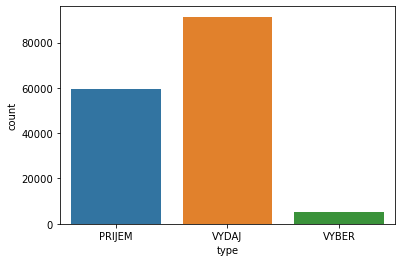

In [39]:
import seaborn as sns
%matplotlib inline
sns.countplot(x=data.type)


In [40]:
data.operation.value_counts()


vyber      70979
unknown    31337
prevod     31132
vklad      22633
Name: operation, dtype: int64

<AxesSubplot:xlabel='operation', ylabel='count'>

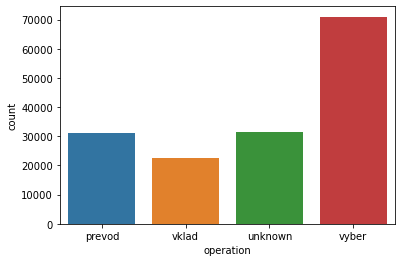

In [41]:
sns.countplot(x=data.operation)



In [42]:
pd.crosstab(data.type, data.operation)

operation,prevod,unknown,vklad,vyber
type,,,,
PRIJEM,5336,31337,22633,0
VYBER,0,0,0,5347
VYDAJ,25796,0,0,65632


In [ ]:
#End Activity 2

In [44]:
import matplotlib.pyplot as plt

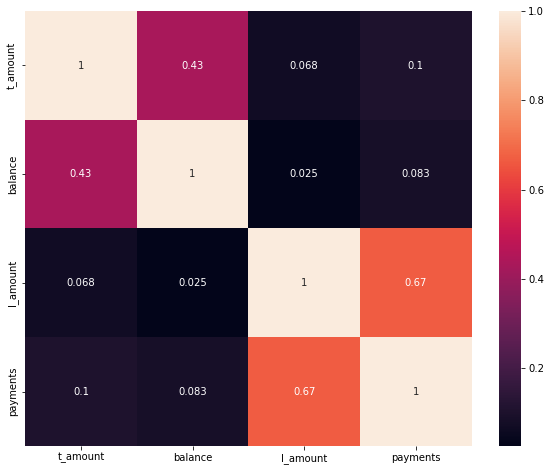

In [45]:
# look for multicolinearity (some columns having almost identical correlation to other variables)
# why can't we look for correlation with our target variable (status)?
corr_matrix=data.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

/Users/miguel/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


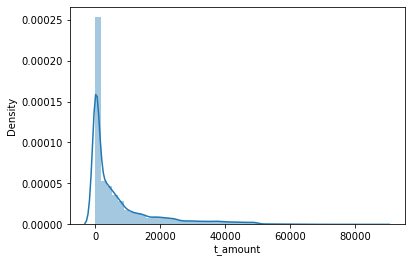

/Users/miguel/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


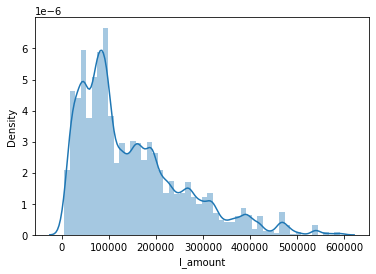

/Users/miguel/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


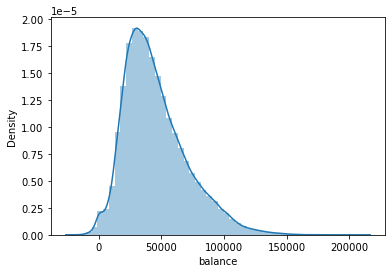

/Users/miguel/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


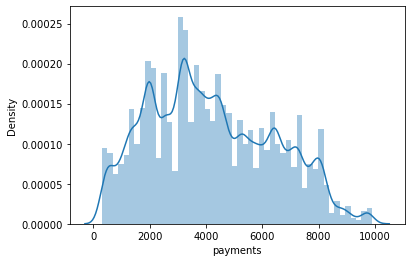

In [50]:
# look at the scale and distribution of values
sns.distplot(data['t_amount'])
plt.show()

sns.distplot(data['l_amount'])
plt.show()

sns.distplot(data['balance'])
plt.show()

sns.distplot(data['payments'])
plt.show()

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler

X_num = data.select_dtypes(include = np.number)
X_cat = data.select_dtypes(include = np.object)

# Scaling data
transformer = MinMaxScaler().fit(X_num)
x_normalized = transformer.transform(X_num)
x_norm = pd.DataFrame(x_normalized)
x_norm.head()

In [ ]:
# Whoa, One step back please. What did I do wrong here?

















In [ ]:
# Need to X-y-split AND train-test-split BEFORE I apply transformations, 
# then train transformation on training set only
y = data['status']
X = data.drop('status', axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler

X_train_num = X_train.select_dtypes(include = np.number)

# Scaling data
transformer = MinMaxScaler().fit(X_train_num) # need to keep transformer
X_train_normalized = transformer.transform(X_train_num)
X_train_norm = pd.DataFrame(X_train_normalized)

In [ ]:
X_train_norm.columns = X_train_num.columns
X_train_norm.head()

In [ ]:
X_train_categorical = X_train.select_dtypes(include = np.object)
X_train_cat = pd.get_dummies(X_train_categorical, 
                             columns=['type', 'operation', 'k_symbol', 'duration'],
                             drop_first=True)
X_train_cat.head()

In [ ]:
# Activity 3
# Explore visually the transformed numerical columns. What do you see?
# Another typical transformation for numerical columns is to take the logarithm. 
# Apply the log transform to columns balance and t_ammount and compare the results with the scaled data.

In [ ]:
# End Activity 3

In [ ]:
# build X_train and y_train
# remember: y = data['status'], y_train selected in train_test_split
X_train_transformed = np.concatenate([X_train_norm, X_train_cat], axis=1)

In [ ]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='multinomial').fit(X_train_transformed, y_train)

In [ ]:
classification = LogisticRegression(random_state=0, solver='saga',
                  multi_class='multinomial').fit(X_train_transformed, y_train)

In [ ]:
# Can we now make predictions on the X_test?
# predictions = classification.predict(X_test)
# classification.score(X_test, y_test)


# NO - need to perform transformations on the X_test as well

In [ ]:
# for numericals
X_test_num = X_test.select_dtypes(include = np.number)

# Scaling data
# we use the transformer that was trained on the training data
X_test_normalized = transformer.transform(X_test_num)
X_test_norm = pd.DataFrame(X_test_normalized)

In [ ]:
# for categoricals
X_test_categorical = X_test.select_dtypes(include = np.object)
X_test_cat = pd.get_dummies(X_test_categorical, 
                            columns=['type', 'operation', 'k_symbol', 'duration'],
                            drop_first=True)
# verify that dummies columns are in the same order and that the same column was dropped
display(list(zip(list(X_train_cat.columns),list(X_test_cat.columns))))
# not needed if you treat each dataframe with one_hot_encoder and save the encode (and the column names)

X_test_cat.head()

In [ ]:
X_test_transformed = np.concatenate([X_test_norm, X_test_cat], axis=1)

In [ ]:
# Now we can make predictions on the test set:
predictions = classification.predict(X_test_transformed)
classification.score(X_test_transformed, y_test)

In [ ]:
print(y_test.value_counts())
# As you would notice here, there is a huge imbalance in the data among the different classes. 
# We will talk more about imbalance and how to resolve it later (tomorrow)


In [ ]:
pd.Series(predictions).value_counts()
# This shows that the disparity in the numbers are amplified by the model

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

In [ ]:
# predicted | A | B | C | D |
# --------------------------
# actual  A | + |  |   |   |
# --------------------------
#         B |   | + |   |   |
# --------------------------
#         C |   |   | + |   |
# --------------------------
#         D |   |   |   | + |

In [ ]:
# bonus: KNN classifier: look at nearest neighbours and use the majority to determine class
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform')
clf.fit(X_train_transformed, y_train)
predictions_clf = clf.predict(X_test_transformed)
clf.score(X_test_transformed, y_test)

In [ ]:
confusion_matrix(y_test, predictions_clf)

In [ ]:
pd.Series(y_test).value_counts()

In [ ]:
pd.Series(predictions_clf).value_counts()